In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1.Data Preparation

In [2]:
def load_csv(path, date_col="Date"):
    df = pd.read_csv(path, parse_dates=[date_col], index_col=date_col).dropna()
    return df

### Load Crypto data

In [3]:
df_bnb = load_csv("data/crypto/BNB-USD.csv")
df_btc = load_csv("data/crypto/BTC-USD.csv")
df_eth = load_csv("data/crypto/ETH-USD.csv")
df_usdc = load_csv("data/crypto/USDC-USD.csv")
df_sol = load_csv("data/crypto/SOL-USD.csv")
df_ada = load_csv("data/crypto/ADA-USD.csv")
df_ada.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440


### Load macro variables

In [4]:
df_euro_r = load_csv("data/macro_variables/euro exchnage rate data.csv")
df_fed_r = load_csv("data/macro_variables/Fed_interest_rate.csv", date_col="DATE")
df_gold = load_csv("data/macro_variables/gold price.csv")
df_sp500 = load_csv("data/macro_variables/S&p_500_index.csv")
df_sp500.head()

,Open,High,Low,Close
Date,,,,
2017-01-03,2251.57,2263.88,2245.13,2257.83
2017-01-04,2261.60,2272.82,2261.60,2270.75
2017-01-05,2268.18,2271.50,2260.45,2269.00
2017-01-06,2271.14,2282.10,2264.06,2276.98
2017-01-09,2273.59,2275.49,2268.90,2268.90


In [5]:
df_macro_variables = load_csv("data/macro_variables/macro_indicators.csv", date_col="Unnamed: 0")
df_macro_variables.index = pd.to_datetime(df_macro_variables.index)
df_macro_variables.head()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
2010-08-18,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.19,0.16,1.46,2.64,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-19,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.19,0.16,1.41,2.58,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-20,0.006329,0.020820,0.000638,0.003814,-0.00596,-0.011558,0.20,0.15,1.47,2.62,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-23,0.028153,0.033316,-0.006001,0.000700,-0.00596,-0.011558,0.19,0.16,1.43,2.60,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855
2010-08-24,0.028153,0.033316,-0.006001,0.000700,-0.00596,-0.011558,0.19,0.16,1.36,2.50,...,0.018686,0.09776,0.032201,-0.012493,146.405698,-0.004313,0.029215,19.67,-0.003546,0.17855


# 2. Feature Engineering

### Create crypto returns

In [6]:
# these are lags we use to calculate return (10 lags that capture short and long term past returns)
lags = {
    #"5d":5,
    "2w":14,
    "3w":21,
    "1m":30,
    "2m":30*2,
    "3m":30*3,
    "6m":30*6,
    "9m":30*9,
    "1y":30*12,
    "2y":30*12*2
}

In [7]:
def calculate_returns(df_returns, df_stock, stock_label):
    for lag_label, lag in lags.items(): 
        df_returns[f"return_{stock_label}_{lag_label}"] = df_stock["Adj Close"].pct_change(lag).add(1).pow(1/lag).sub(1).dropna()

In [8]:
df_returns=pd.DataFrame()
calculate_returns(df_returns, df_bnb, "bnb")
calculate_returns(df_returns, df_btc, "btc")
calculate_returns(df_returns, df_eth, "eth")
calculate_returns(df_returns, df_usdc, "usdc")
calculate_returns(df_returns, df_sol, "sol")
calculate_returns(df_returns, df_ada, "ada")
df_returns = df_returns.dropna()

In [9]:
df_returns.head()

,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_btc_2w,...,return_sol_2y,return_ada_2w,return_ada_3w,return_ada_1m,return_ada_2m,return_ada_3m,return_ada_6m,return_ada_9m,return_ada_1y,return_ada_2y
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,0.006481,0.006782,0.001628,0.002125,-0.001959,0.000011,0.001231,0.000427,0.004791,0.007613,...,0.006772,0.022451,0.016706,0.005717,0.001599,-0.001527,-0.003765,-0.000905,-0.000171,0.004925
2022-04-01,0.008328,0.008718,0.002936,0.002904,-0.001845,0.000204,0.001445,0.000281,0.004840,0.007299,...,0.007183,0.022505,0.018679,0.007239,0.001703,-0.001852,-0.003655,-0.000692,-0.000206,0.004948
2022-04-02,0.006358,0.007599,0.002737,0.002092,-0.002172,0.000144,0.001144,0.000427,0.004753,0.005989,...,0.006982,0.017953,0.018252,0.008280,0.001001,-0.001947,-0.003541,-0.000756,-0.000046,0.004918
2022-04-03,0.010188,0.010473,0.006186,0.003395,-0.001428,0.000095,0.001180,0.000207,0.004733,0.008526,...,0.007206,0.021782,0.019473,0.011447,0.002370,-0.001203,-0.003510,-0.000623,-0.000077,0.004983
2022-04-04,0.008694,0.008652,0.005040,0.003136,-0.001397,0.000153,0.001356,-0.000035,0.004679,0.009085,...,0.007386,0.020197,0.019779,0.011307,0.002305,-0.000869,-0.003333,-0.000342,0.000022,0.005020


In [10]:
df_returns.describe()

,return_bnb_2w,return_bnb_3w,return_bnb_1m,return_bnb_2m,return_bnb_3m,return_bnb_6m,return_bnb_9m,return_bnb_1y,return_bnb_2y,return_btc_2w,...,return_sol_2y,return_ada_2w,return_ada_3w,return_ada_1m,return_ada_2m,return_ada_3m,return_ada_6m,return_ada_9m,return_ada_1y,return_ada_2y
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,-0.000344,0.001171,0.002090,0.001000,-0.000817,-0.000516,0.001140,-0.000581,0.004542,-0.003121,...,0.007091,-0.004435,-0.000270,0.002971,-0.000686,-0.002477,-0.004327,-0.000915,-0.000693,0.004438
std,0.005175,0.004916,0.002511,0.001124,0.001031,0.000551,0.000234,0.000482,0.000140,0.006586,...,0.000156,0.013611,0.012847,0.007125,0.001628,0.001297,0.000477,0.000339,0.000404,0.000389
min,-0.007137,-0.006832,-0.003675,-0.000866,-0.002172,-0.001678,0.000593,-0.001316,0.004365,-0.012494,...,0.006772,-0.018289,-0.016381,-0.011813,-0.003740,-0.006120,-0.004882,-0.001696,-0.001364,0.003897
25%,-0.004500,-0.002698,0.000619,0.000529,-0.001803,-0.000991,0.001062,-0.000889,0.004429,-0.009072,...,0.006981,-0.014152,-0.010873,-0.000028,-0.001935,-0.003296,-0.004705,-0.001067,-0.001018,0.004052
50%,-0.002470,0.000462,0.002450,0.000761,-0.001150,-0.000635,0.001162,-0.000674,0.004521,-0.004046,...,0.007071,-0.009957,-0.006348,0.005098,-0.000976,-0.002249,-0.004496,-0.000878,-0.000721,0.004379
75%,0.002447,0.004374,0.003986,0.001839,-0.000116,0.000084,0.001265,-0.000425,0.004626,0.000809,...,0.007188,-0.002263,0.011365,0.008380,0.000597,-0.001596,-0.004036,-0.000704,-0.000411,0.004774
max,0.010188,0.010473,0.006186,0.003395,0.001423,0.000223,0.001688,0.000427,0.004840,0.009085,...,0.007437,0.022505,0.019779,0.011788,0.002370,-0.000602,-0.003333,-0.000342,0.000022,0.005020


### Prepare macro_variables

In [11]:
df_factors = pd.DataFrame()

In [12]:
df_factors["return_gold_2w"] = df_gold["Close/Last"].pct_change(14).add(1).pow(1/14).sub(1).dropna()
df_factors["euro_r"] = df_euro_r[" Close"]/100
df_factors["fed_dff"] = df_fed_r["DFF"]/100
df_factors["return_sp500_2w"] = df_sp500[" Close"].pct_change(14).add(1).pow(1/14).sub(1).dropna()
df_factors = df_factors.dropna()
df_factors.describe()

,return_gold_2w,euro_r,fed_dff,return_sp500_2w
count,1245.000000,1245.000000,1245.000000,1245.000000
mean,-0.000346,0.011547,0.010537,0.000529
std,0.002191,0.000410,0.009005,0.002995
min,-0.011498,0.010693,0.000400,-0.020975
25%,-0.001614,0.011216,0.000900,-0.000366
50%,-0.000277,0.011555,0.011600,0.000998
75%,0.001074,0.011842,0.019100,0.001903
max,0.007571,0.012507,0.024500,0.015150


In [13]:
df_macro_variables.describe()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,...,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000
mean,0.004137,0.025337,0.001363,0.007633,0.002541,0.011133,0.548138,0.507831,1.450009,2.120468,...,0.007607,0.036854,0.020866,0.080978,190.157652,0.005036,0.057370,27.255768,0.004904,0.054005
std,0.073198,0.190883,0.005401,0.011064,0.010002,0.039059,0.729116,0.739997,0.652684,0.644368,...,0.042976,0.069881,0.072718,0.087929,39.256862,0.005685,0.057504,4.833265,0.026538,0.089752
min,-0.099074,-0.099074,-0.015082,-0.017196,-0.017409,-0.034123,0.040000,-0.050000,0.190000,0.520000,...,-0.062291,-0.077123,-0.212686,-0.040928,136.622587,-0.011356,-0.046477,19.670000,-0.115152,-0.186395
25%,-0.015467,-0.004663,-0.002206,0.001825,-0.001390,-0.003139,0.090000,0.040000,0.900000,1.710000,...,-0.008840,0.000591,0.001322,0.023769,157.831104,0.002250,0.027441,23.410000,-0.008163,-0.024906
50%,0.007688,0.012521,0.001459,0.007460,0.000651,0.002109,0.140000,0.100000,1.470000,2.150000,...,0.006958,0.017940,0.019112,0.055786,186.957120,0.004205,0.052284,26.690000,0.008718,0.065848
75%,0.031076,0.027570,0.004462,0.012508,0.003386,0.017588,0.910000,0.720000,1.800000,2.580000,...,0.013721,0.046132,0.034800,0.151526,214.568614,0.007335,0.070894,30.200000,0.021898,0.115815
max,2.118341,2.505427,0.026035,0.086050,0.125544,0.476813,2.450000,2.430000,3.090000,3.750000,...,0.257387,0.314073,0.295036,0.349151,291.954574,0.019193,0.200392,39.980000,0.062705,0.281967


### Calculate factor betas

* The objectif is to calculate factor betas for each stock and include them as features for our machine learning model later

In [14]:
df_return_eth = pd.DataFrame()
calculate_returns(df_returns=df_return_eth, df_stock=df_eth, stock_label="eth")
df_return_eth.head()

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y
Date,,,,,,,,,
2017-11-23,0.017689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-24,0.033539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-25,0.028485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,0.030878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-27,0.030198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

In [16]:
df_factors_eth = df_macro_variables.join(df_return_eth["return_eth_2w"]).dropna().sort_index()
df_factors_eth.head()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy,return_eth_2w
2017-11-29,0.040101,0.032362,-0.001273,0.007224,-0.002701,-0.005049,1.16,1.27,2.09,2.37,...,-0.007115,-0.002807,0.058085,203.387818,0.005331,0.063560,30.92,0.024859,0.165473,0.017930
2017-11-30,0.040101,0.032362,-0.001273,0.007224,-0.002701,-0.005049,1.07,1.25,2.14,2.42,...,-0.007115,-0.002807,0.058085,203.387818,0.005331,0.063560,30.92,0.024859,0.165473,0.021727
2017-12-01,0.040101,0.032362,-0.001273,0.007224,-0.002701,-0.005049,1.16,1.25,2.13,2.37,...,-0.007115,-0.002807,0.058085,204.611215,0.006015,0.063322,31.30,0.012290,0.165736,0.024511
2017-12-05,-0.014495,-0.023106,0.005412,0.012187,-0.002701,-0.005049,1.16,1.28,2.15,2.36,...,-0.007115,-0.002807,0.058085,204.611215,0.006015,0.063322,31.30,0.012290,0.165736,0.018099
2017-12-06,-0.014495,-0.023106,0.005412,0.012187,-0.000325,-0.004205,1.16,1.28,2.11,2.33,...,-0.007115,-0.002807,0.058085,204.611215,0.006015,0.063322,31.30,0.012290,0.165736,0.008508


In [17]:
betas_eth = (RollingOLS(endog=df_factors_eth.return_eth_2w,
    exog=sm.add_constant(df_factors_eth.drop("return_eth_2w", axis=1)),
     window=252)
     .fit(params_only=True)
     .params
     .drop('const', axis=1))

betas_eth = betas_eth.fillna(betas_eth.mean())
betas_eth

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
2017-11-29,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8651.647794,40529.272088,-8457.118862,-7684.307742,-1.002195,197361.763810,11277.396603,-0.008671,-1.562825,-3.654041
2017-11-30,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8651.647794,40529.272088,-8457.118862,-7684.307742,-1.002195,197361.763810,11277.396603,-0.008671,-1.562825,-3.654041
2017-12-01,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8651.647794,40529.272088,-8457.118862,-7684.307742,-1.002195,197361.763810,11277.396603,-0.008671,-1.562825,-3.654041
2017-12-05,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8651.647794,40529.272088,-8457.118862,-7684.307742,-1.002195,197361.763810,11277.396603,-0.008671,-1.562825,-3.654041
2017-12-06,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8651.647794,40529.272088,-8457.118862,-7684.307742,-1.002195,197361.763810,11277.396603,-0.008671,-1.562825,-3.654041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,-150.942492,62.341327,154.687256,-61.731687,-1.996073,-5.942391,3.742107,0.258820,-0.367566,0.615180,...,-8.848278,4.932090,23.547158,4.544920,-0.006618,284.962390,5.253986,-0.013234,0.454345,-0.338841
2022-03-22,-128.659719,60.094792,125.170759,-62.164289,-3.044227,-0.057462,-0.466352,-0.016196,0.010048,-0.435621,...,-48.364723,19.414050,62.282695,6.693021,-0.013859,1253.032452,21.006859,-0.013211,0.455856,-0.342106
2022-03-23,-1.990066,8.679894,3.970889,-9.700167,0.300711,-0.315610,0.030125,0.130007,-0.075290,0.173958,...,-3.436141,6.102691,47.396798,0.156934,-0.002007,24.096469,6.595046,-0.014230,0.482880,-0.359583
2022-03-24,-2.327798,1.169173,1.454907,-0.806394,-1.006177,0.811195,-0.128552,0.255552,-0.019216,0.006678,...,0.793515,3.259978,37.854108,-9.264142,-0.002201,86.654238,3.897788,-0.014184,0.493560,-0.372914


In [18]:
betas_eth.describe()

,WM1NS_wow,WM1NS_mom,WM2NS_wow,WM2NS_mom,WALCL_wow,WALCL_mom,DFF,DTB3,DGS5,DGS10,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,...,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,795.000000,7.950000e+02,7.950000e+02,795.000000,795.000000,795.000000
mean,26.579676,11.428697,-27.795762,-10.894978,-1.232098,0.887956,1.596735,0.609498,-0.560605,0.882700,...,8.651648e+03,4.052927e+04,-8.457119e+03,-7.684308e+03,-1.002195,1.973618e+05,1.127740e+04,-0.008671,-1.562825,-3.654041
std,597.525914,198.972396,691.486137,168.522871,37.173243,23.229379,26.270279,11.621727,9.451217,15.106463,...,4.188412e+05,1.207097e+06,2.840199e+05,1.150808e+05,15.796924,2.811947e+06,2.008998e+05,0.114812,111.611268,70.613633
min,-2184.702906,-163.542161,-19176.764884,-4663.471005,-802.624783,-177.438021,-56.630639,-51.755301,-256.139056,-31.817237,...,-5.507029e+06,-9.031773e+06,-7.402758e+06,-2.637717e+06,-404.413448,-2.154763e+06,-5.689224e+05,-1.503784,-2805.000000,-1355.093750
25%,-0.253238,-0.053009,-27.795762,-10.894978,-1.232098,-0.089505,-0.160041,-0.029265,-0.560605,-0.147508,...,-3.383684e+00,-3.364827e+00,-8.457119e+03,-7.684308e+03,-1.002195,-2.174761e+01,-3.728933e+00,-0.008671,-1.562825,-3.654041
50%,0.625287,0.222886,-4.409238,-2.618903,-1.232098,0.759790,0.462896,0.167847,-0.308920,0.556811,...,9.775514e+00,5.019584e+00,-2.002920e+01,-9.264142e+00,-0.002001,9.193538e+01,7.857245e+00,-0.005421,-0.084978,-0.427215
75%,26.579676,11.428697,2.650424,0.675118,0.769881,0.887956,1.596735,0.609498,0.088966,0.882700,...,8.651648e+03,4.052927e+04,1.291350e+01,2.941807e+00,0.001407,1.973618e+05,1.127740e+04,0.002387,0.199751,-0.070303
max,16474.085378,5554.389151,2193.131518,187.940171,248.964018,431.632434,719.229225,318.939923,28.330350,413.770481,...,1.021926e+07,3.268172e+07,2.980483e+06,5.183425e+05,119.039530,7.118945e+07,5.512458e+06,1.182037,918.171875,1021.656250


In [19]:
data_eth = df_return_eth.join(betas_eth.shift()).dropna()
data_eth

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y,WM1NS_wow,...,GFDEGDQ188S_qoq,GFDEGDQ188S_yoy,DIVIDEND_qoq,DIVIDEND_yoy,SPCS20RSA,SPCS20RSA_mom,SPCS20RSA_yoy,MULTPL_SHILLER_PE_RATIO_MONTH,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.003444,-0.002165,0.000882,0.001142,-0.001831,0.000528,0.001907,-0.000323,-0.000767,-2.193097,...,455.759766,671.078125,-112.451111,-47.188477,-0.015576,1471.769531,-50.602295,0.041620,5.795044,-13.314514
2019-10-31,0.002347,-0.001949,0.001224,0.001158,-0.001878,0.000638,0.001992,-0.000356,-0.000676,2.854206,...,423.453125,540.101562,-44.775391,-108.530273,-0.023530,571.132812,35.479004,0.120537,-13.775391,18.240723
2019-11-01,0.004144,0.000364,0.000596,0.000517,-0.002110,0.000657,0.001981,-0.000477,-0.000745,-1.500970,...,-157.992188,199.585938,151.488281,-7.602051,-0.006281,126.482422,18.345947,0.020269,-14.508545,-8.184082
2019-11-04,0.004533,-0.000155,0.001841,0.001123,-0.002142,0.000480,0.002144,-0.000333,-0.000825,-2.165184,...,-689.073242,-1403.734375,310.494141,122.258301,0.029912,-1631.015625,-91.345215,-0.049528,-1.558594,20.757324
2019-11-05,0.006745,0.002031,0.002995,0.001799,-0.001986,0.000588,0.001713,-0.000321,-0.000786,0.906084,...,-471.402344,21.617188,139.794983,47.303223,0.000807,448.062500,2.151489,-0.036466,38.135620,-27.883301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,0.010672,-0.000347,0.001583,-0.000583,-0.003630,-0.000335,0.001396,0.001478,0.004283,19.769289,...,37.512630,-7.823578,74.026785,-31.211367,0.002579,-661.221859,-7.718551,-0.011503,0.443396,-0.354795
2022-03-22,0.010273,0.000010,0.004113,0.002510,-0.003241,-0.000331,0.001833,0.001527,0.004297,-150.942492,...,-8.848278,4.932090,23.547158,4.544920,-0.006618,284.962390,5.253986,-0.013234,0.454345,-0.338841
2022-03-23,0.007506,0.001290,0.005466,0.003862,-0.003372,0.000185,0.001872,0.001622,0.004260,-128.659719,...,-48.364723,19.414050,62.282695,6.693021,-0.013859,1253.032452,21.006859,-0.013211,0.455856,-0.342106


### Add Momentum factors

In [20]:
for lag_label, lag in list(lags.items())[1:]:
    data_eth[f"momentum_{lag_label}"] = data_eth[f"return_eth_{lag_label}"].sub(data_eth["return_eth_2w"])

In [21]:
data_eth.head()

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y,WM1NS_wow,...,MULTPL_SHILLER_PE_RATIO_MONTH_mom,MULTPL_SHILLER_PE_RATIO_MONTH_yoy,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.003444,-0.002165,0.000882,0.001142,-0.001831,0.000528,0.001907,-0.000323,-0.000767,-2.193097,...,5.795044,-13.314514,-0.005609,-0.002562,-0.002302,-0.005275,-0.002916,-0.001537,-0.003767,-0.004211
2019-10-31,0.002347,-0.001949,0.001224,0.001158,-0.001878,0.000638,0.001992,-0.000356,-0.000676,2.854206,...,-13.775391,18.240723,-0.004295,-0.001123,-0.001189,-0.004224,-0.001709,-0.000354,-0.002702,-0.003022
2019-11-01,0.004144,0.000364,0.000596,0.000517,-0.002110,0.000657,0.001981,-0.000477,-0.000745,-1.500970,...,-14.508545,-8.184082,-0.003780,-0.003548,-0.003626,-0.006254,-0.003487,-0.002163,-0.004621,-0.004889
2019-11-04,0.004533,-0.000155,0.001841,0.001123,-0.002142,0.000480,0.002144,-0.000333,-0.000825,-2.165184,...,-1.558594,20.757324,-0.004688,-0.002692,-0.003410,-0.006675,-0.004054,-0.002390,-0.004866,-0.005358
2019-11-05,0.006745,0.002031,0.002995,0.001799,-0.001986,0.000588,0.001713,-0.000321,-0.000786,0.906084,...,38.135620,-27.883301,-0.004714,-0.003750,-0.004946,-0.008731,-0.006157,-0.005032,-0.007066,-0.007531


### add Date indicators

In [22]:
data_eth["year"] = data_eth.index.year
data_eth["month"] = data_eth.index.month

In [23]:
data_eth.head()

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y,WM1NS_wow,...,momentum_3w,momentum_1m,momentum_2m,momentum_3m,momentum_6m,momentum_9m,momentum_1y,momentum_2y,year,month
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.003444,-0.002165,0.000882,0.001142,-0.001831,0.000528,0.001907,-0.000323,-0.000767,-2.193097,...,-0.005609,-0.002562,-0.002302,-0.005275,-0.002916,-0.001537,-0.003767,-0.004211,2019,10
2019-10-31,0.002347,-0.001949,0.001224,0.001158,-0.001878,0.000638,0.001992,-0.000356,-0.000676,2.854206,...,-0.004295,-0.001123,-0.001189,-0.004224,-0.001709,-0.000354,-0.002702,-0.003022,2019,10
2019-11-01,0.004144,0.000364,0.000596,0.000517,-0.002110,0.000657,0.001981,-0.000477,-0.000745,-1.500970,...,-0.003780,-0.003548,-0.003626,-0.006254,-0.003487,-0.002163,-0.004621,-0.004889,2019,11
2019-11-04,0.004533,-0.000155,0.001841,0.001123,-0.002142,0.000480,0.002144,-0.000333,-0.000825,-2.165184,...,-0.004688,-0.002692,-0.003410,-0.006675,-0.004054,-0.002390,-0.004866,-0.005358,2019,11
2019-11-05,0.006745,0.002031,0.002995,0.001799,-0.001986,0.000588,0.001713,-0.000321,-0.000786,0.906084,...,-0.004714,-0.003750,-0.004946,-0.008731,-0.006157,-0.005032,-0.007066,-0.007531,2019,11


### add lagged returns

In [24]:
for t in range(1,10):
    data_eth[f"return_eth_2w_t-{t}"] = data_eth["return_eth_2w"].shift(t)

data_eth.head()

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y,WM1NS_wow,...,month,return_eth_2w_t-1,return_eth_2w_t-2,return_eth_2w_t-3,return_eth_2w_t-4,return_eth_2w_t-5,return_eth_2w_t-6,return_eth_2w_t-7,return_eth_2w_t-8,return_eth_2w_t-9
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.003444,-0.002165,0.000882,0.001142,-0.001831,0.000528,0.001907,-0.000323,-0.000767,-2.193097,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-31,0.002347,-0.001949,0.001224,0.001158,-0.001878,0.000638,0.001992,-0.000356,-0.000676,2.854206,...,10,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,0.004144,0.000364,0.000596,0.000517,-0.002110,0.000657,0.001981,-0.000477,-0.000745,-1.500970,...,11,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,0.004533,-0.000155,0.001841,0.001123,-0.002142,0.000480,0.002144,-0.000333,-0.000825,-2.165184,...,11,0.004144,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05,0.006745,0.002031,0.002995,0.001799,-0.001986,0.000588,0.001713,-0.000321,-0.000786,0.906084,...,11,0.004533,0.004144,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN


### Create target

our target will be the future 5d return of each crypto based on the above calculated features

In [25]:
data_eth["target_2w"] = data_eth["return_eth_2w"].shift(-1)
data_eth.head()

,return_eth_2w,return_eth_3w,return_eth_1m,return_eth_2m,return_eth_3m,return_eth_6m,return_eth_9m,return_eth_1y,return_eth_2y,WM1NS_wow,...,return_eth_2w_t-1,return_eth_2w_t-2,return_eth_2w_t-3,return_eth_2w_t-4,return_eth_2w_t-5,return_eth_2w_t-6,return_eth_2w_t-7,return_eth_2w_t-8,return_eth_2w_t-9,target_2w
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-30,0.003444,-0.002165,0.000882,0.001142,-0.001831,0.000528,0.001907,-0.000323,-0.000767,-2.193097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002347
2019-10-31,0.002347,-0.001949,0.001224,0.001158,-0.001878,0.000638,0.001992,-0.000356,-0.000676,2.854206,...,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004144
2019-11-01,0.004144,0.000364,0.000596,0.000517,-0.002110,0.000657,0.001981,-0.000477,-0.000745,-1.500970,...,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004533
2019-11-04,0.004533,-0.000155,0.001841,0.001123,-0.002142,0.000480,0.002144,-0.000333,-0.000825,-2.165184,...,0.004144,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,0.006745
2019-11-05,0.006745,0.002031,0.002995,0.001799,-0.001986,0.000588,0.001713,-0.000321,-0.000786,0.906084,...,0.004533,0.004144,0.002347,0.003444,NaN,NaN,NaN,NaN,NaN,0.011877


In [26]:
data_eth.shape

(441, 191)

# 3.Modeling

### Create dummy variables for categorical data

In [27]:
data_eth = pd.get_dummies(data_eth, columns=["year", "month"], prefix=["year", "month"], prefix_sep=["_", "_"])
data_eth.columns

Index(['return_eth_2w', 'return_eth_3w', 'return_eth_1m', 'return_eth_2m',
       'return_eth_3m', 'return_eth_6m', 'return_eth_9m', 'return_eth_1y',
       'return_eth_2y', 'WM1NS_wow',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=205)

In [28]:
data_eth = data_eth.dropna()

### Split the data

In [29]:
num_train = int(data_eth.shape[0] * 2/3)

In [30]:
X_train = data_eth[:num_train].drop("target_2w", axis=1)
y_train = data_eth[:num_train]["target_2w"]

X_test = data_eth[num_train:].drop("target_2w", axis=1)
y_test = data_eth[num_train:]["target_2w"]

### Training

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor()

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
rf.score(X_train, y_train)

0.957485695418281

In [35]:
rf.score(X_test, y_test)

0.673102558017624

In [36]:
import matplotlib.pyplot as plt

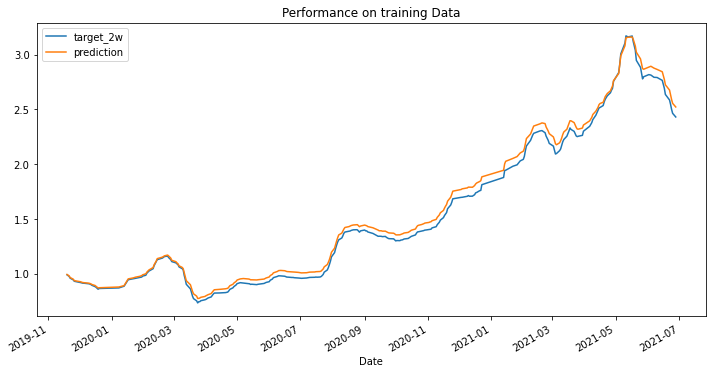

In [37]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_train).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_train), index=y_train.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on training Data");

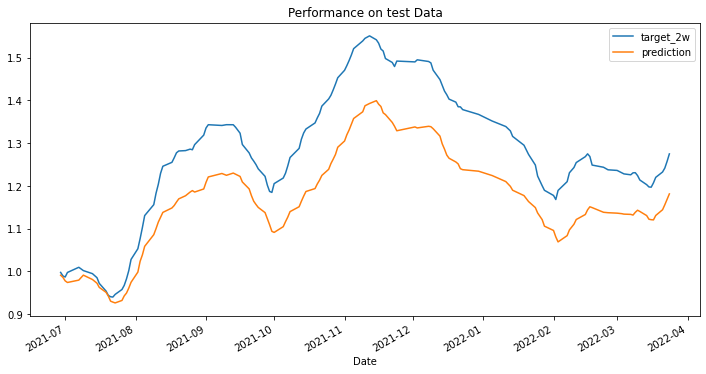

In [38]:
fix, ax = plt.subplots(figsize=(12,6))
(1+y_test).cumprod().plot(ax=ax, legend="target_5d")
(1 + pd.Series(rf.predict(X_test), index=y_test.index, name="prediction")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("Performance on test Data");

* The model was capable of predicting the evolution of the target

### the top 20 indicators

<BarContainer object of 19 artists>

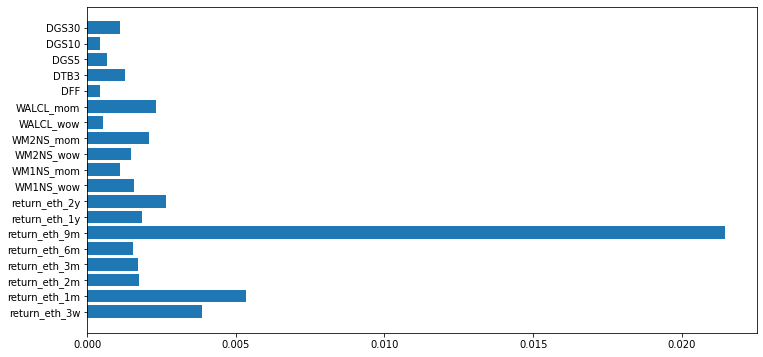

In [39]:
fix, ax = plt.subplots(figsize=(12,6))
ax.barh(X_train.columns[1:20], rf.feature_importances_[1:20])

# 4.Alpha Signal using Machine Learning

The alpha signal generated by the model for the bnb crypto is are the predictions of the model

In [40]:
alpha_vector = rf.predict(X_test)

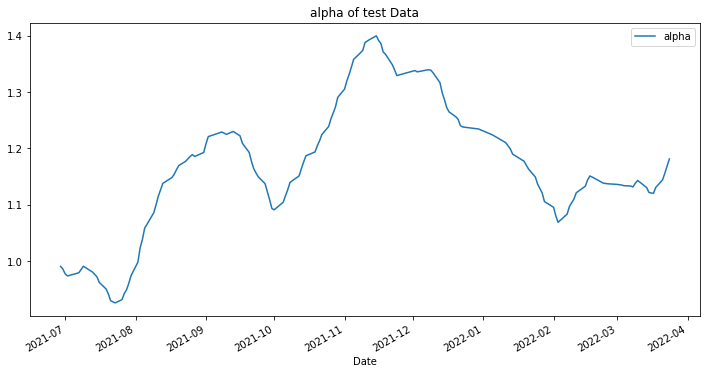

In [41]:
fix, ax = plt.subplots(figsize=(12,6))
(1 + pd.Series(alpha_vector, index=y_test.index, name="alpha")).cumprod().plot(ax=ax, legend="prediction")
ax.set_title("alpha of test Data");

# Strategy Definition

* add sell buy signal from the alpha generated by the AI

In [42]:
result_df_eth = pd.DataFrame(y_test)
result_df_eth["alpha_AI"] = alpha_vector
result_df_eth.head()

,target_2w,alpha_AI
Date,,
2021-06-29,-0.002862,-0.009481
2021-06-30,-0.008205,-0.004951
2021-07-01,-0.002660,-0.008437
2021-07-02,0.010879,-0.003833
2021-07-07,0.012132,0.005695


In [43]:
result_df_eth["signal"] = pd.qcut(result_df_eth["alpha_AI"], q=3, labels=False).replace({
    0:"SELL",
    1:"HOLD",
    2:"BUY"
})
result_df_eth["buy"] = result_df_eth["signal"]=="BUY"
result_df_eth["sell"] = result_df_eth["signal"]=="SELL"
result_df_eth = result_df_eth.join(df_eth["Close"])


In [44]:
result_df_eth.head()

,target_2w,alpha_AI,signal,buy,sell,Close
Date,,,,,,
2021-06-29,-0.002862,-0.009481,SELL,False,True,2160.768311
2021-06-30,-0.008205,-0.004951,SELL,False,True,2274.547607
2021-07-01,-0.002660,-0.008437,SELL,False,True,2113.605469
2021-07-02,0.010879,-0.003833,HOLD,False,False,2150.040283
2021-07-07,0.012132,0.005695,HOLD,False,False,2315.161865


# Evaluation

In [45]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from enum import Enum


class Transaction(Enum):
    BUY = 1
    SELL = -1
    HOLD = 0

def TestStrategyLOnly(strategy, productPrice, capital):

    portfolio = pd.DataFrame(columns=['value', 'cash', 'equity', 'transaction'])
    portfolio0 = {'value': capital, 'cash': capital, 'equity': 0, 'transaction': Transaction.HOLD}
    portfolio = portfolio.append(portfolio0, ignore_index=True)

    lastTransaction = Transaction.HOLD

    for i in range(0, len(productPrice)):

        if portfolio is None:
            portfolio = pd.DataFrame(columns=['value', 'cash', 'equity', 'transaction'])
            portfolio = portfolio.append(portfolio0, ignore_index=True)

        if portfolio.value.values[-1] <= 0:
            break

        elif strategy[i] == 2 and lastTransaction != Transaction.BUY:
            portfolio = buyequity(portfolio, productPrice[i])
            lastTransaction = Transaction.BUY

        elif strategy[i] == 0 and lastTransaction == Transaction.BUY:
            portfolio = sellEquityNoShort(portfolio, productPrice[i])
            lastTransaction = Transaction.SELL

        else:
            portfolio1 = {'value': portfolio.cash.values[-1] + portfolio.equity.values[-1] * productPrice[i],
                          'cash': portfolio.cash.values[-1], 'equity': portfolio.equity.values[-1],
                          'transaction': Transaction.HOLD}
            portfolio = portfolio.append(portfolio1, ignore_index=True)

    return portfolio


def TestStrategyLOnlyBuySellSignals(buySignals, sellSignals, productPrice, capital):
    strategy = [x + y for (x, y) in zip([1]*len(buySignals), buySignals)]
    strategy = [x - y for (x, y) in zip(strategy, sellSignals)]

    return TestStrategyLOnly(strategy, productPrice, capital)


def buyequity(portfolio, price):
    if portfolio.value.values[-1] <= 0 or portfolio.cash.values[-1] <= 0:
        return None
    equitytemp = portfolio.equity.values[-1] + portfolio.cash.values[-1] / price

    portfoliotemp = {'value': equitytemp * price, 'cash': 0, 'equity': equitytemp, 'transaction': Transaction.BUY}
    portfolio = portfolio.append(portfoliotemp, ignore_index=True)
    return portfolio


def sellEquityNoShort(portfolio, price):

    if portfolio.equity.values[-1] <= 0:
        portfolioTemp = {'value': portfolio.equity.values[-1] * price + portfolio.cash.values[-1],
                         'cash': portfolio.cash.values[-1], 'equity': portfolio.equity.values[-1],
                         'transaction': Transaction.HOLD}

    else:
        portfolioTemp = {'value': portfolio.equity.values[-1] * price, 'cash': portfolio.equity.values[-1] * price,
                         'equity': 0, 'transaction': Transaction.SELL}

    portfolio = portfolio.append(portfolioTemp, ignore_index=True)
    return portfolio


def volatility(portfolioValue):
    volTemp = sum((np.log(portfolioValue[i] / portfolioValue[i - 1])) ** 2 for i in range(1, len(portfolioValue)))
    return np.sqrt(volTemp)  # /len(portfolioValue)


def sharpRatio(portfolio, riskFreeRate):
    if portfolio[0] == 0:
        return None
    stdv = volatility(portfolio)
    if stdv == 0:
        return 0
    returns = (portfolio[-1] - portfolio[0]) / portfolio[0] - riskFreeRate
    return returns / stdv

def TradingResults(portfolio):
    if len(portfolio['value'].values) == 0:
        return None
    gains = portfolio['value'].values[-1] / portfolio['value'].values[0] - 1
    vol = volatility(portfolio['value'].values)
    drawdowns = AllDrawDowns(portfolio['value'].values)
    drawdown = MaxDrawDown(drawdowns)
    drawdownDuration = MaxDrawDownDuration(drawdowns)

    return {"gains": gains,
            'volatility': vol,
            "MaxDrawDown": drawdown,
            "MaxDrawDownDuration": drawdownDuration}


def LocalMax(portfolioValue):  # Returns al local maxims in a time series
    # smoothedGains = savgol_filter(portfolioValue, window_size, poly_order)  we need to verify if it optimize
    # runtime without affecting performance
    maxlocindex = np.array(argrelextrema(portfolioValue, np.greater)[0])

    return [portfolioValue[k] for k in maxlocindex], np.array(maxlocindex)


def ConsecutiveMaxOnly(maxloc, maxlocIndex):  # Returns maximas by in an increasing order
    if len(maxloc) != len(maxlocIndex):
        raise ValueError("local maxima and local maxima arrays must have the same length")

    k = 0
    while k < len(maxloc) - 1:
        if maxloc[k] > maxloc[k + 1]:
            maxloc = np.delete(maxloc, k + 1)
            maxlocIndex = np.delete(maxlocIndex, k + 1)
        else:
            k += 1
    return maxloc, maxlocIndex


def DrawDown(series):  # Returns DrawDown and DrawDown duration, if portfolio did not recoup initial value
    if len(series) <= 1:
        return 0, 0
    elif np.argmax(series) == 0:
        return (series[0] - min(series))*100/series[0], len(series)
    else:
        return ((series[0] - min(series))*100/series[0]), np.argmax(series > series[0])


def AllDrawDowns(portfoliovalue):  # Return all drawdowns of the portfolio
    localmax, localmaxindices = LocalMax(portfoliovalue)
    localmax, localmaxindices = ConsecutiveMaxOnly(localmax, localmaxindices)
    drawdowns = pd.DataFrame(columns=['start', 'low', 'end', 'drawdown', 'duration'])

    if len(localmaxindices) == 0:
        return drawdowns

    for k in range(0, len(localmaxindices)-1):
        temp = portfoliovalue[localmaxindices[k]:localmaxindices[k + 1]+1]
        drawdowntemp, drawdowndurationtemp = DrawDown(temp)
        drawdowns = drawdowns.append({'start': int(localmaxindices[k]), 'low': localmaxindices[k] + np.argmin(temp),
                                      'end': localmaxindices[k] + drawdowndurationtemp,
                                      'drawdown': drawdowntemp, 'duration': drawdowndurationtemp}
                                     , ignore_index=True)

    temp = portfoliovalue[localmaxindices[len(localmaxindices)-1]:]
    drawdowntemp, drawdowndurationtemp = DrawDown(temp)
    drawdowns = drawdowns.append({'start': int(localmaxindices[len(localmaxindices)-1]),
                                  'low': localmaxindices[len(localmaxindices)-1] + np.argmin(temp),
                                  'end': localmaxindices[len(localmaxindices)-1] + drawdowndurationtemp,
                                  'drawdown': drawdowntemp, 'duration': drawdowndurationtemp}
                                 , ignore_index=True)
    return drawdowns


def MaxDrawDown(alldrawdowns):
    if len(alldrawdowns) == 0:
        return None

    return alldrawdowns.loc[alldrawdowns['drawdown'].idxmax()]


def MaxDrawDownDuration(alldrawdowns):
    if len(alldrawdowns) == 0:
        return None

    return alldrawdowns.loc[alldrawdowns['duration'].idxmax()]

## calculate portfolio

The initial portfolio budget is 1_000_000

In [47]:
portfolio = TestStrategyLOnlyBuySellSignals(result_df_eth["buy"].map(int).to_list(),
                                            result_df_eth["sell"].map(int).to_list(),
                                            result_df_eth["Close"].to_list(), 1_000_000)
portfolio = portfolio.iloc[1:,:].astype({
    "value":float,
})
portfolio.index = result_df_eth.index

In [48]:
portfolio

,value,cash,equity,transaction
Date,,,,
2021-06-29,1.000000e+06,1000000,0,Transaction.HOLD
2021-06-30,1.000000e+06,1000000,0,Transaction.HOLD
2021-07-01,1.000000e+06,1000000,0,Transaction.HOLD
2021-07-02,1.000000e+06,1000000,0,Transaction.HOLD
2021-07-07,1.000000e+06,1000000,0,Transaction.HOLD
...,...,...,...,...
2022-03-18,1.387173e+06,0,470.971586,Transaction.BUY
2022-03-21,1.364865e+06,0,470.971586,Transaction.HOLD
2022-03-22,1.400260e+06,0,470.971586,Transaction.HOLD


## Portfolio Value (monthly)

In [49]:
portfolio.resample("1M").agg({"value":np.mean})

,value
Date,
2021-06-30,1.000000e+06
2021-07-31,9.321711e+05
2021-08-31,1.211325e+06
2021-09-30,1.395557e+06
2021-10-31,1.542293e+06
2021-11-30,1.762380e+06
2021-12-31,1.682836e+06
2022-01-31,1.682836e+06
2022-02-28,1.600485e+06


## Percentage of winning trades vs Losing trades (monthly)

In [50]:
buy_transactions = np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'BUY')[0]
buy_transaction_values = [portfolio['value'].values[k] for k in buy_transactions]

sell_transactions = np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'SELL')[0]
sell_transaction_values = [portfolio['value'].values[k] for k in sell_transactions]

nb_transactions = len(np.where(np.asanyarray([e.name for e in portfolio['transaction']]) == 'BUY')[0])
print('Total number of transactions : ', nb_transactions)
print('rendement final : ', (portfolio['value'].values[-1]/portfolio['value'].values[0]-1)*100, '%')
print('rendement de la BnH : ', (result_df_eth.Close.values[-1]/result_df_eth.Close.values[0] - 1)*100, '%')

if len(sell_transaction_values) != len(buy_transaction_values):
    sell_transaction_values.append(portfolio['value'].values[-1])

transactions_delta = np.array(sell_transaction_values) - np.array(buy_transaction_values)

winning_transactions = [k for k in transactions_delta if k >= 0]
losing_transactions = [k for k in transactions_delta if k < 0]

if nb_transactions == 0:
    winning_percent = 0
    losing_percent = 0
else :
    winning_percent = len(winning_transactions)/nb_transactions
    losing_percent = len(losing_transactions)/nb_transactions
print('number of winning transactions is : ', len(winning_transactions))
print('percentage of winning transactions is : ', winning_percent)
print('average winnings in dollars : ', np.mean(winning_transactions))

print('number of losing transactions is : ', len(losing_transactions))
print('percentage of losing transactions is : ', losing_percent)
print('average losings in dollars : ', np.mean(losing_transactions))

Total number of transactions :  5
rendement final :  46.38088936392306 %
rendement de la BnH :  43.840595781488226 %
number of winning transactions is :  3
percentage of winning transactions is :  0.6
average winnings in dollars :  285238.96585250244
number of losing transactions is :  2
percentage of losing transactions is :  0.4
average losings in dollars :  -195954.00195913838


### Standard deviation and sharp ratio of the returns 

In [51]:
def volatility(portfolioValue):
    volTemp = sum((np.log(portfolioValue[i] / portfolioValue[i - 1])) ** 2 for i in range(1, len(portfolioValue)))
    return np.sqrt(volTemp)  # /len(portfolioValue)


def sharpRatio(portfolio, riskFreeRate):
    if portfolio[0] == 0:
        return None
    stdv = volatility(portfolio)
    if stdv == 0:
        return 0
    returns = (portfolio[-1] - portfolio[0]) / portfolio[0] - riskFreeRate
    return returns / stdv

In [52]:
volatility(portfolio["value"].values)

0.4071436573370415

In [53]:
sharpRatio(portfolio["value"].values, 0.0165)

1.0986512636961934

## Strategy annualized return

In [54]:
gains = (portfolio["value"].values[-1] - portfolio["value"].values[0])/portfolio["value"].values[0]
print("gains: ", gains)

print("annualized return : ", (gains + 1)**(1/5) + 1)

gains:  0.4638088936392306
annualized return :  2.07918742530602


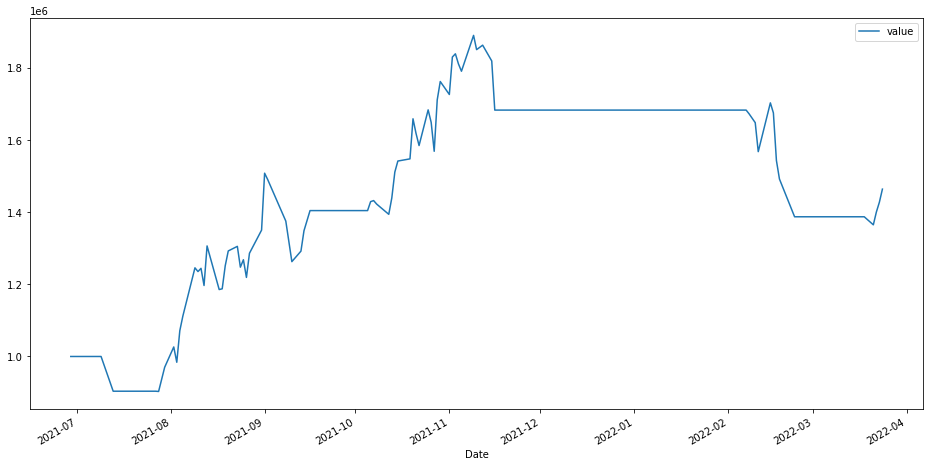

In [55]:
portfolio.plot(y="value", figsize=(16,8));